# Predicting passanger survival (Titanic)

The problem is to predict whether a passanger survived or not based on several factors, including the ticket price and age.

Since the data contains missing values and categorical attriutes, there are several pre-processing steps needed.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Loading the data

In [25]:
# titanic dataset
data_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
df = pd.read_csv(data_url)
# prints the number of NaN values per column
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Input missing values

In [26]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [27]:
len(df)

891

In [28]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Drop columns/rows

In [29]:
# consider dropping the entire column
df = df.drop(columns=['Cabin'])

# rows with missing values
df[df['Embarked'].isna()]
# remove rows with missing values
df = df.drop(df[df['Embarked'].isna()].index)

In [30]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [31]:
len(df)

889

In [32]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


### Dropping irrelevant attributes

In [33]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


## Training a classifier

In [34]:
# prepares the training data
X = df.loc[:, 'Pclass':'Embarked']
y = df['Survived']

# splits the data in training + testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [35]:
tree = DecisionTreeClassifier()
#tree = RandomForestClassifier(n_estimators=10, random_state=0)
tree.fit(X_train, y_train)

ValueError: could not convert string to float: 'male'

The error is generated since there are 'object' columns, which represent categorical attributes. This need to be encoded as numeric values.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [37]:
df['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 889, dtype: object

### Encoding categorical attributes

In [38]:
# creates the encoder object
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
# encodes and replaces the original values on the dataframe
values = enc.fit_transform(df.loc[:, ['Sex']])

In [39]:
values

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [40]:
# checks the categories name ['female', 'male']
enc.categories_

[array(['female', 'male'], dtype=object)]

In [41]:
# adds the columns to the dataframe
df['Female'] = values[:, 0]
df['Male'] = values[:, 1]
# removes the categorical column
df = df.drop(columns=['Sex'])

In [42]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Female,Male
0,0,3,22.000000,1,0,7.2500,S,0.0,1.0
1,1,1,38.000000,1,0,71.2833,C,1.0,0.0
2,1,3,26.000000,0,0,7.9250,S,1.0,0.0
3,1,1,35.000000,1,0,53.1000,S,1.0,0.0
4,0,3,35.000000,0,0,8.0500,S,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,S,0.0,1.0
887,1,1,19.000000,0,0,30.0000,S,1.0,0.0
888,0,3,29.699118,1,2,23.4500,S,1.0,0.0
889,1,1,26.000000,0,0,30.0000,C,0.0,1.0


In [43]:
values = enc.fit_transform(df.loc[:, ['Embarked']])
values

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [44]:
enc.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [45]:
# adds the columns to the dataframe
df['C'] = values[:, 0]
df['Q'] = values[:, 1]
df['S'] = values[:, 2]
# removes the categorical column
df = df.drop(columns=['Embarked'])

In [46]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Female,Male,C,Q,S
0,0,3,22.000000,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,1,38.000000,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,1,3,26.000000,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,1,35.000000,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,0,3,35.000000,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0.0,1.0,0.0,0.0,1.0
887,1,1,19.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0
888,0,3,29.699118,1,2,23.4500,1.0,0.0,0.0,0.0,1.0
889,1,1,26.000000,0,0,30.0000,0.0,1.0,1.0,0.0,0.0


## Training the classifier (take 2)

In [47]:
# prepares the training data
X = df.loc[:, 'Pclass':'S']
y = df['Survived']

# splits the data in training + testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
tree.score(X_test, y_test)

0.7668161434977578

## Visualising the model

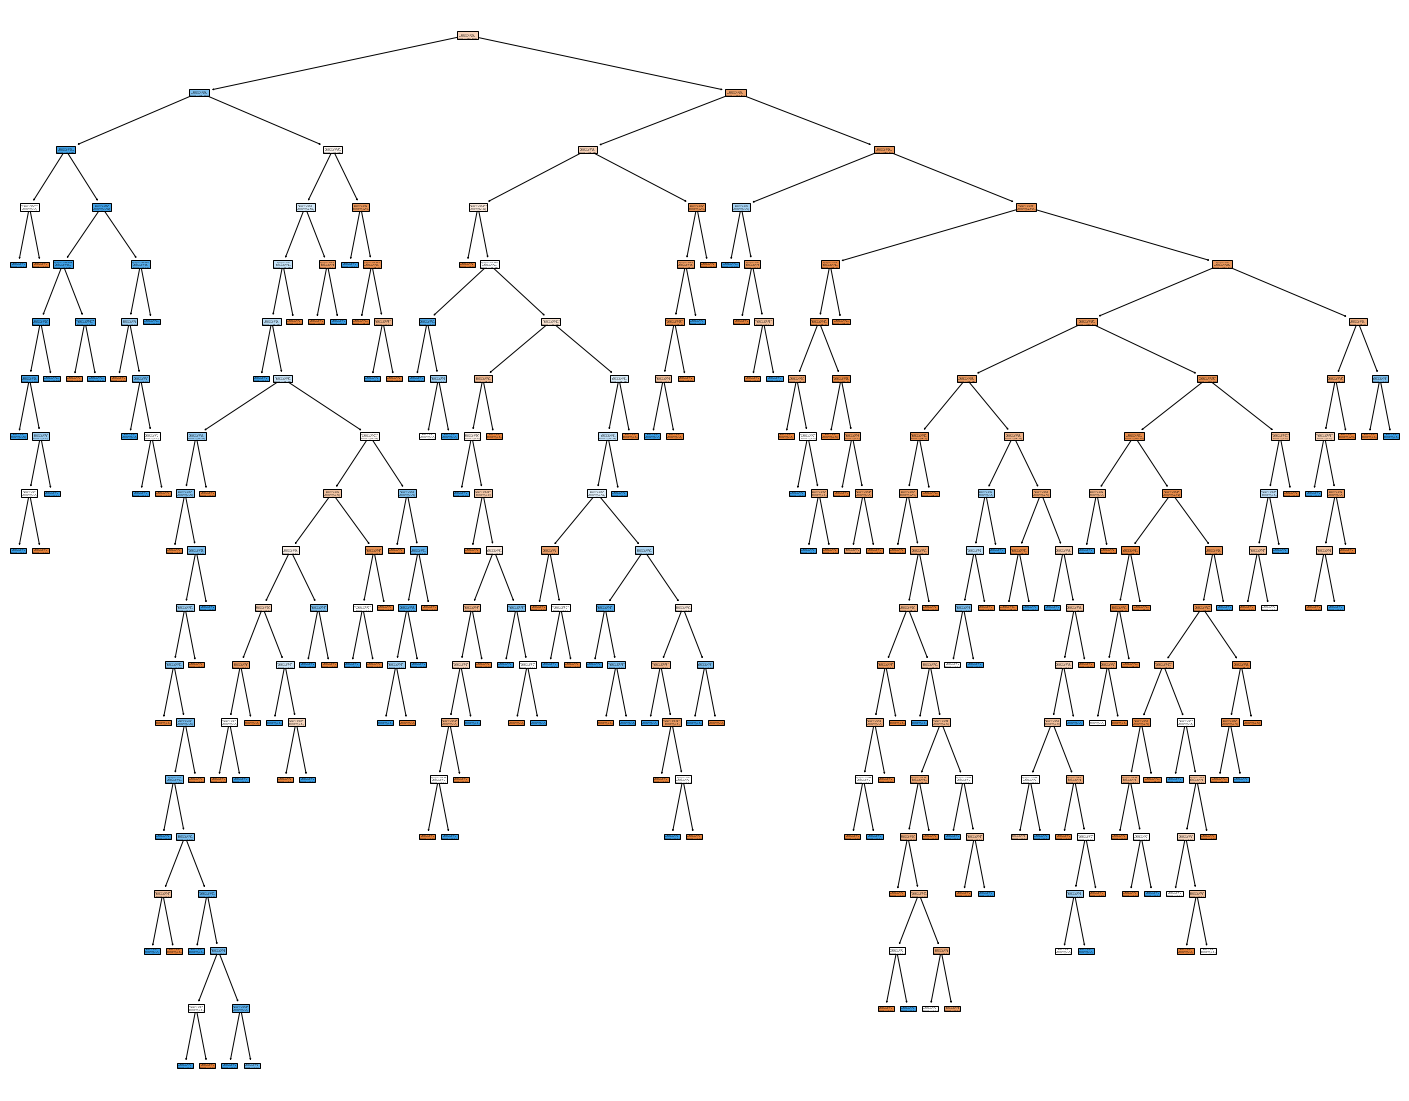

In [49]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(tree, filled=True)

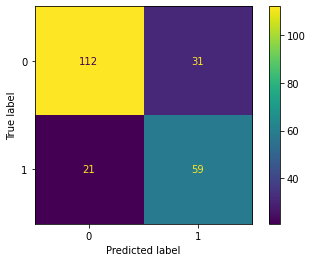

In [50]:
predictions = tree.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
# displays the matrix
_ = disp.plot()